In [40]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = np.asarray(X_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.int32).flatten()
X_test = np.asarray(X_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.int32).flatten()

num_training=49000
num_validation=1000
num_test=10000


mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

#print(X_train[0].shape)

mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
X_train = (X_train - mean_pixel) / std_pixel
X_val = (X_val - mean_pixel) / std_pixel
X_test = (X_test - mean_pixel) / std_pixel

In [41]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(64)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64)

imgbatch, labels = next(iter(train_ds))
(imgbatch[:].shape)

TensorShape([64, 32, 32, 3])

In [42]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32, 3, activation = None)
        self.relu1 = tf.keras.layers.ReLU()
        self.drop1 = tf.keras.layers.Dropout(rate = 0.5)
        self.conv2 = tf.keras.layers.Conv2D(64, 3, activation = None)
        self.relu2 = tf.keras.layers.ReLU()
        self.drop2 = tf.keras.layers.Dropout(rate = 0.5)
        self.conv3 = tf.keras.layers.Conv2D(128, 3, activation = None)
        self.relu3 = tf.keras.layers.ReLU()
        self.drop3 = tf.keras.layers.Dropout(rate = 0.5)

        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(64, activation = 'relu')
        self.fc2 = tf.keras.layers.Dense(64, activation = 'relu')
        self.fc3 = tf.keras.layers.Dense(10)
        
    def call(self, x):
        x = self.conv1(x)
        #x = self.bn1(x)
        x = self.relu1(x)
        x = self.drop1(x)
        x = self.conv2(x)
        #x = self.bn2(x)
        x = self.relu2(x)
        x = self.drop2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.drop3(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return self.fc3(x)
        
model = MyModel()
predictions = model(imgbatch)

In [43]:
print(predictions[:5])

tf.Tensor(
[[-8.45981017e-03 -9.74943414e-02  9.56896096e-02  9.63223875e-02
   4.87702750e-02 -2.29156110e-02 -2.67959852e-02 -3.28816362e-02
   1.15916789e-01 -7.75385723e-02]
 [-6.17141761e-02 -1.47654772e-01  1.38516441e-01  1.59952581e-01
   1.30781540e-04 -7.29866475e-02 -3.22147720e-02 -3.76882367e-02
   1.60153151e-01 -1.71828464e-01]
 [ 1.67738646e-02 -2.21007109e-01  1.61079511e-01  2.49886647e-01
  -7.72584556e-03 -8.60556290e-02 -7.71840960e-02 -1.42509654e-01
   1.63423017e-01 -1.51551068e-01]
 [-4.57234979e-02 -1.04025811e-01  3.77960280e-02  7.72011816e-04
  -1.54425041e-03 -3.34696844e-02 -3.37344483e-02 -5.05056530e-02
   1.13440000e-01 -6.40833303e-02]
 [ 1.48678024e-03 -1.47323579e-01  1.96412355e-01  1.07327364e-01
   2.27942523e-02 -2.43036579e-02  1.65893715e-02 -4.94495034e-03
   1.55472472e-01 -9.43986624e-02]], shape=(5, 10), dtype=float32)


In [44]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.09801043, 0.08966131, 0.10876866, 0.10883752, 0.10378318,
        0.0966038 , 0.09622967, 0.09564582, 0.11099115, 0.09146854],
       [0.09399848, 0.08625758, 0.11483648, 0.1173247 , 0.09999534,
        0.09294483, 0.09681268, 0.09628423, 0.11734824, 0.08419742],
       [0.10151957, 0.08003553, 0.11727917, 0.12817088, 0.09906259,
        0.09159916, 0.0924154 , 0.08657128, 0.11755434, 0.08579207],
       [0.09711386, 0.09161378, 0.1055731 , 0.10173584, 0.10150046,
        0.09831119, 0.09828517, 0.09665056, 0.11386888, 0.09534713],
       [0.097385  , 0.08391982, 0.11834425, 0.10825752, 0.0994823 ,
        0.09490551, 0.09886693, 0.09676065, 0.1135971 , 0.0884809 ]],
      dtype=float32)>

In [45]:
print("Prcitions: {}".format(tf.argmax(predictions[:5], axis = 1)))
print("   Labels: {}".format(labels[:5]))

Prcitions: [8 8 3 8 2]
   Labels: [2 7 6 4 8]


In [46]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='val_accuracy')

In [47]:
y_ = model(imgbatch, training = False)
l = loss_object(y_true = labels, y_pred = y_)
print("Loss Example: {}".format(l))

Loss Example: 2.284944772720337


In [48]:
print("Eager execution: {}".format(tf.executing_eagerly()))

Eager execution: True


In [49]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training = True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    #print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(), loss.numpy()))
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [50]:
train_step(imgbatch, labels)
train_step(imgbatch, labels)
train_step(imgbatch, labels)
train_step(imgbatch, labels)
train_step(imgbatch, labels)
train_step(imgbatch, labels)

In [51]:
@tf.function
def val_step (images, labels):
    predictions = model(images, training=False)
    v_loss = loss_object(labels, predictions)

    val_loss(v_loss)
    val_accuracy(labels, predictions)

In [52]:
train_loss_results = []
train_accuracy_results = []
EPOCHS = 15

for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    val_loss.reset_states()
    val_accuracy.reset_states()
    
    for images, labels in train_ds:
        train_step(images, labels)
        
    for val_images, val_labels in val_ds:
        val_step(val_images, val_labels)
        
    
    template = 'Epoch {}, Train Loss: {}, Train Accuracy: {}, Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch+1,
                          train_loss.result(),
                          train_accuracy.result()*100,
                          val_loss.result(),
                          val_accuracy.result()*100))
    train_loss_results.append(train_loss.result())
    train_accuracy_results.append(train_accuracy.result())

Epoch 1, Train Loss: 1.6381040811538696, Train Accuracy: 39.724491119384766, Val Loss: 1.274937629699707, Val Accuracy: 54.599998474121094
Epoch 2, Train Loss: 1.2026729583740234, Train Accuracy: 57.13469314575195, Val Loss: 1.0624327659606934, Val Accuracy: 61.5
Epoch 3, Train Loss: 1.050442099571228, Train Accuracy: 62.642852783203125, Val Loss: 1.0088495016098022, Val Accuracy: 63.80000305175781
Epoch 4, Train Loss: 0.9570035934448242, Train Accuracy: 65.98163604736328, Val Loss: 0.9675841331481934, Val Accuracy: 65.20000457763672
Epoch 5, Train Loss: 0.8861222863197327, Train Accuracy: 69.01428985595703, Val Loss: 0.9253342747688293, Val Accuracy: 67.5
Epoch 6, Train Loss: 0.8297789096832275, Train Accuracy: 70.75102233886719, Val Loss: 0.9525259733200073, Val Accuracy: 67.19999694824219
Epoch 7, Train Loss: 0.7779701948165894, Train Accuracy: 72.62449645996094, Val Loss: 0.9656226634979248, Val Accuracy: 66.79999542236328
Epoch 8, Train Loss: 0.7418324947357178, Train Accuracy: 73

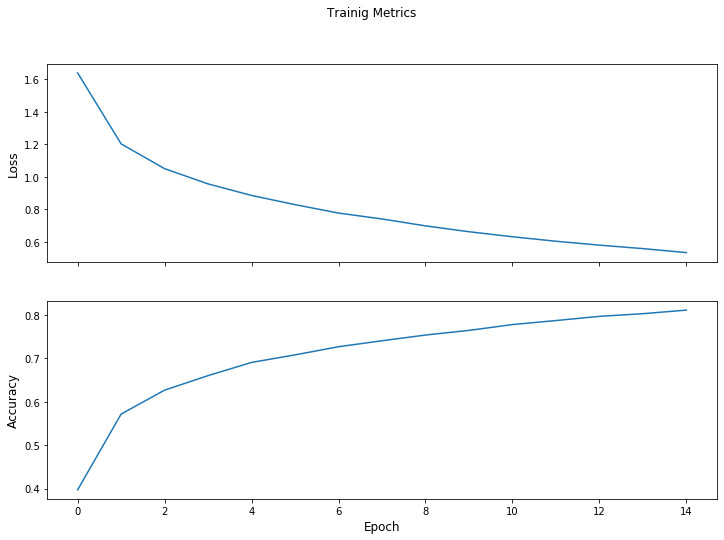

In [55]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Trainig Metrics')

axes[0].set_ylabel("Loss", fontsize = 12)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy" , fontsize = 12)
axes[1].set_xlabel("Epoch", fontsize = 12)
axes[1].plot(train_accuracy_results)

plt.show()